In [1]:
# Install required libraries
!pip install pandas numpy matplotlib seaborn scikit-learn scipy -q

# Import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("✓ All libraries installed and imported successfully!")

✓ All libraries installed and imported successfully!


In [2]:
# Upload dataset directly
from google.colab import files
import os
import zipfile

print("="*80)
print("UPLOAD DATASET")
print("="*80)
print("\nSteps:")
print("1. Go to: https://www.kaggle.com/datasets/shreyanshdangi/global-health-mortality-and-population-since-2000")
print("2. Click 'Download' button")
print("3. Upload the 'archive.zip' file here")
print("\nWaiting for file upload...\n")

# Upload file
uploaded = files.upload()
uploaded_file = list(uploaded.keys())[0]
print(f"✓ File uploaded: {uploaded_file}")

# Extract ZIP file
print(f"\nExtracting {uploaded_file}...")
with zipfile.ZipFile(uploaded_file, 'r') as zip_ref:
    zip_ref.extractall('/content/')

# List extracted files
extracted_files = os.listdir('/content/')
csv_files = [f for f in extracted_files if f.endswith('.csv')]

print(f"✓ Dataset extracted successfully!")
print(f"\nCSV files found: {csv_files}")

UPLOAD DATASET

Steps:
1. Go to: https://www.kaggle.com/datasets/shreyanshdangi/global-health-mortality-and-population-since-2000
2. Click 'Download' button
3. Upload the 'archive.zip' file here

Waiting for file upload...



Saving archive.zip to archive.zip
✓ File uploaded: archive.zip

Extracting archive.zip...
✓ Dataset extracted successfully!

CSV files found: ['Series-Metadata.csv', 'Data.csv']


In [14]:
# Load Data.csv
print("Loading Data.csv...")
df_raw = pd.read_csv('/content/Data.csv')

print(f"\n✓ Data loaded successfully!")
print(f"\nRaw Dataset Shape: {df_raw.shape}")
print(f"Rows: {df_raw.shape[0]}, Columns: {df_raw.shape[1]}")

print(f"\nColumn Names:")
for i, col in enumerate(df_raw.columns, 1):
    print(f"  {i}. {col}")

print(f"\nFirst 5 rows:")
print(df_raw.head())

# Prepare data for analysis
# Keep Series Name and Country Name as identifiers
# Convert year columns (2000-2023) to numeric
df = df_raw.copy()

# Identify year columns (numeric column names)
year_cols = [col for col in df.columns if str(col).isdigit()]
print(f"\n\nYear columns found: {len(year_cols)}")
print(f"Years: {year_cols}")

# Convert year columns to numeric
for col in year_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

print(f"\n✓ Data prepared for analysis!")
print(f"Numerical year columns: {len(year_cols)}")

Loading Data.csv...

✓ Data loaded successfully!

Raw Dataset Shape: (23870, 26)
Rows: 23870, Columns: 26

Column Names:
  1. Series Name
  2. Country Name
  3. 2000
  4. 2001
  5. 2002
  6. 2003
  7. 2004
  8. 2005
  9. 2006
  10. 2007
  11. 2008
  12. 2009
  13. 2010
  14. 2011
  15. 2012
  16. 2013
  17. 2014
  18. 2015
  19. 2016
  20. 2017
  21. 2018
  22. 2019
  23. 2020
  24. 2021
  25. 2022
  26. 2023

First 5 rows:
                                         Series Name    Country Name    2000  \
0  Adolescent fertility rate (births per 1,000 wo...     Afghanistan  154.31   
1  Adolescent fertility rate (births per 1,000 wo...         Albania  14.743   
2  Adolescent fertility rate (births per 1,000 wo...         Algeria   8.658   
3  Adolescent fertility rate (births per 1,000 wo...  American Samoa  48.376   
4  Adolescent fertility rate (births per 1,000 wo...         Andorra   9.075   

      2001     2002    2003    2004     2005     2006     2007  ...    2014  \
0  152.471  

In [15]:
print("Data Cleaning")
print("="*80)

# Get year columns
year_cols = [col for col in df.columns if str(col).isdigit()]

# Check missing values in year columns
print("\nMissing Values in Year Columns:")
missing = df[year_cols].isnull().sum()
if missing.sum() > 0:
    print(f"Total missing values: {missing.sum()}")
    print(missing[missing > 0])
else:
    print("No missing values found!")

# Fill missing values with median for year columns
print("\nFilling missing values with median...")
for col in year_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)
        print(f"  ✓ Filled {col}")

# Remove duplicate rows
print(f"\nRemoving duplicates...")
duplicates_before = df.duplicated().sum()
df = df.drop_duplicates()
print(f"  Duplicates removed: {duplicates_before}")

print(f"\n✓ Data Cleaning Complete!")
print(f"Final shape: {df.shape}")
print(f"Missing values in year columns: {df[year_cols].isnull().sum().sum()}")

Data Cleaning

Missing Values in Year Columns:
Total missing values: 125879
2000     5137
2001     5162
2002     5076
2003     4757
2004     4647
2005     4664
2006     4638
2007     4626
2008     4576
2009     4554
2010     4487
2011     4497
2012     4512
2013     4454
2014     4446
2015     4476
2016     4456
2017     4498
2018     4496
2019     4629
2020     4889
2021     5634
2022     7609
2023    14959
dtype: int64

Filling missing values with median...
  ✓ Filled 2000
  ✓ Filled 2001
  ✓ Filled 2002
  ✓ Filled 2003
  ✓ Filled 2004
  ✓ Filled 2005
  ✓ Filled 2006
  ✓ Filled 2007
  ✓ Filled 2008
  ✓ Filled 2009
  ✓ Filled 2010
  ✓ Filled 2011
  ✓ Filled 2012
  ✓ Filled 2013
  ✓ Filled 2014
  ✓ Filled 2015
  ✓ Filled 2016
  ✓ Filled 2017
  ✓ Filled 2018
  ✓ Filled 2019
  ✓ Filled 2020
  ✓ Filled 2021
  ✓ Filled 2022
  ✓ Filled 2023

Removing duplicates...
  Duplicates removed: 0

✓ Data Cleaning Complete!
Final shape: (23870, 26)
Missing values in year columns: 0


In [16]:
print("Exploratory Data Analysis")
print("="*80)

# Get only year columns (numerical data)
year_cols = [col for col in df.columns if str(col).isdigit()]

print(f"\nNumerical Columns (Years): {len(year_cols)}")
print(f"Years: {year_cols}")

# Basic statistics for year columns
print("\n\nBasic Statistics (Year Columns):")
print(df[year_cols].describe())

# Data types
print("\n\nData Types:")
print(df.dtypes)

# Check for missing values
print(f"\n\nMissing Values in Year Columns:")
missing_counts = df[year_cols].isnull().sum()
if missing_counts.sum() > 0:
    print(f"Total missing values: {missing_counts.sum()}")
else:
    print("No missing values found!")

Exploratory Data Analysis

Numerical Columns (Years): 24
Years: ['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']


Basic Statistics (Year Columns):
               2000          2001          2002          2003          2004  \
count  2.387000e+04  2.387000e+04  2.387000e+04  2.387000e+04  2.387000e+04   
mean   1.394864e+03  1.369058e+03  1.339775e+03  1.308377e+03  1.286407e+03   
std    2.688813e+04  2.619670e+04  2.533801e+04  2.437420e+04  2.348120e+04   
min   -1.135665e+01 -3.847671e+00 -2.170699e+00 -2.053038e+00 -2.292944e+00   
25%    8.600000e+00  8.537894e+00  8.585909e+00  8.213831e+00  8.031036e+00   
50%    2.990000e+01  2.955976e+01  2.974880e+01  2.950000e+01  2.920000e+01   
75%    7.410000e+01  7.397077e+01  7.447756e+01  7.510000e+01  7.574286e+01   
max    2.619731e+06  2.536439e+06  2.439487e+06  2.327375e+06  2.215269e+06 

Creating visualizations...



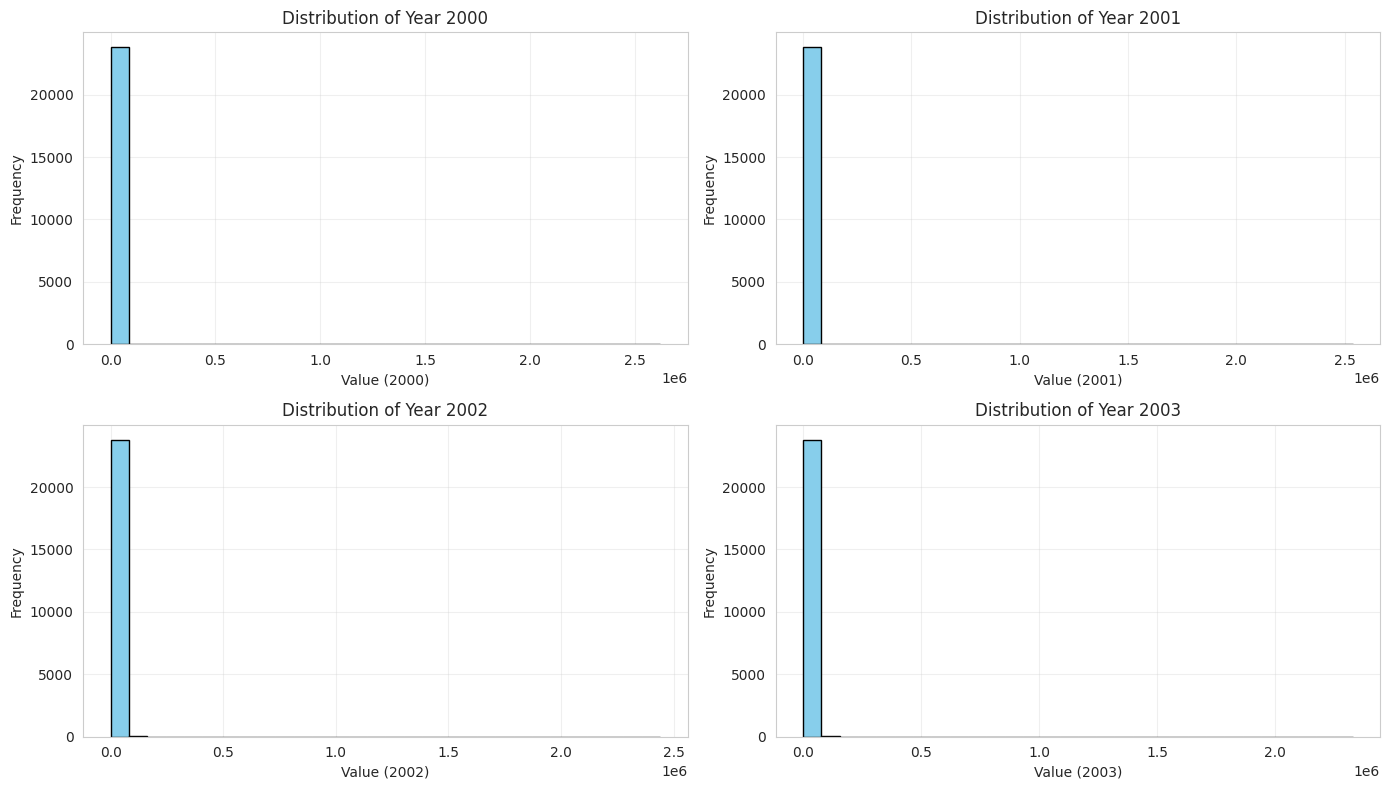

✓ Visualizations created!


In [17]:
# Visualize distributions
print("Creating visualizations...\n")

# Get year columns
year_cols = [col for col in df.columns if str(col).isdigit()]

# Create subplots for first 4 years
cols_to_plot = year_cols[:4] if len(year_cols) >= 4 else year_cols
fig, axes = plt.subplots(2, 2, figsize=(14, 8))
axes = axes.flatten()

for idx, col in enumerate(cols_to_plot):
    axes[idx].hist(df[col].dropna(), bins=30, color='skyblue', edgecolor='black')
    axes[idx].set_title(f'Distribution of Year {col}')
    axes[idx].set_xlabel(f'Value ({col})')
    axes[idx].set_ylabel('Frequency')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✓ Visualizations created!")

Correlation Analysis


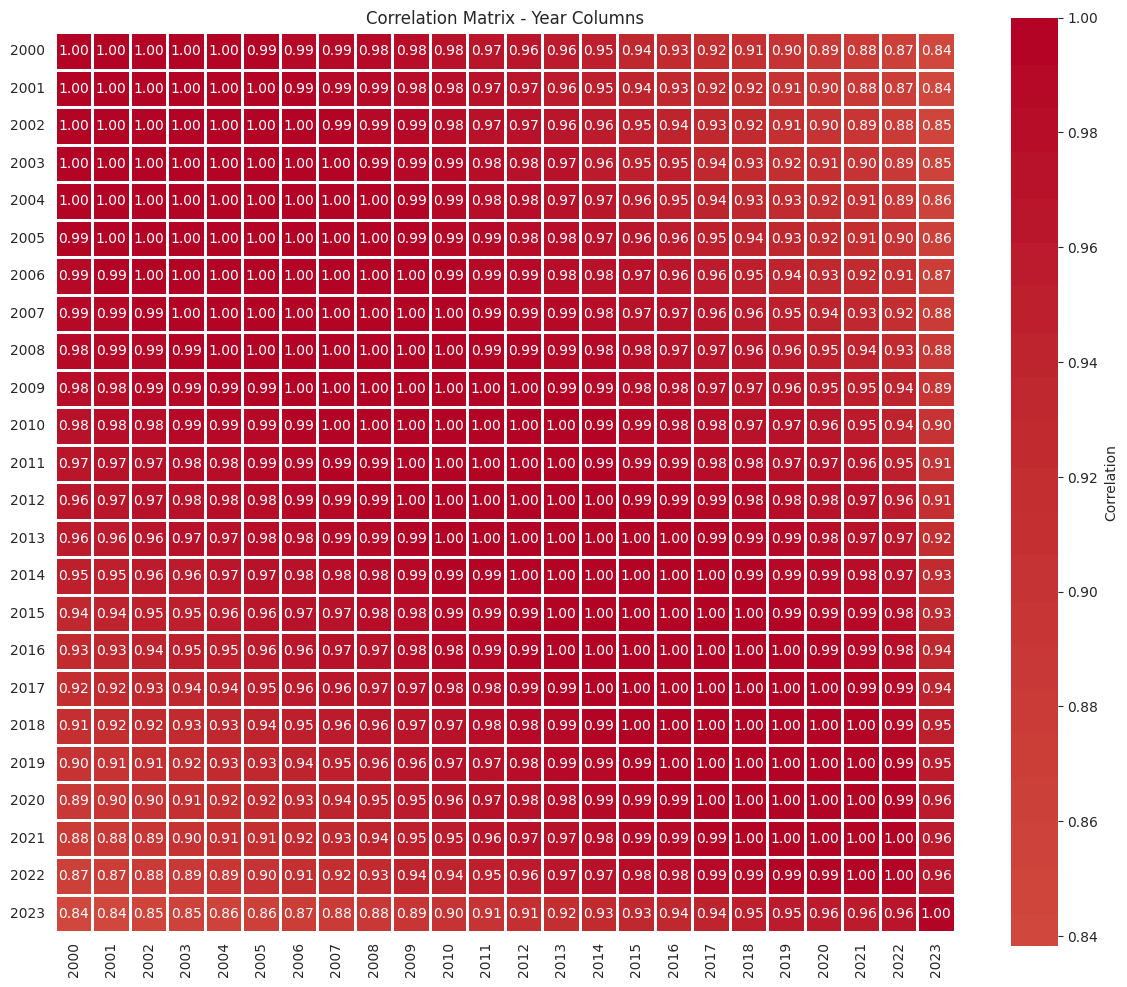


Highly Correlated Year Pairs (|r| > 0.9):
  Year 2000 ↔ Year 2001: 1.000
  Year 2000 ↔ Year 2002: 0.999
  Year 2000 ↔ Year 2003: 0.998
  Year 2000 ↔ Year 2004: 0.996
  Year 2000 ↔ Year 2005: 0.994
  Year 2000 ↔ Year 2006: 0.992
  Year 2000 ↔ Year 2007: 0.988
  Year 2000 ↔ Year 2008: 0.985
  Year 2000 ↔ Year 2009: 0.980
  Year 2000 ↔ Year 2010: 0.975
  Year 2000 ↔ Year 2011: 0.967
  Year 2000 ↔ Year 2012: 0.963
  Year 2000 ↔ Year 2013: 0.955
  Year 2000 ↔ Year 2014: 0.945
  Year 2000 ↔ Year 2015: 0.935
  Year 2000 ↔ Year 2016: 0.928
  Year 2000 ↔ Year 2017: 0.918
  Year 2000 ↔ Year 2018: 0.909
  Year 2000 ↔ Year 2019: 0.900
  Year 2001 ↔ Year 2002: 1.000
  Year 2001 ↔ Year 2003: 0.999
  Year 2001 ↔ Year 2004: 0.998
  Year 2001 ↔ Year 2005: 0.996
  Year 2001 ↔ Year 2006: 0.994
  Year 2001 ↔ Year 2007: 0.991
  Year 2001 ↔ Year 2008: 0.988
  Year 2001 ↔ Year 2009: 0.983
  Year 2001 ↔ Year 2010: 0.979
  Year 2001 ↔ Year 2011: 0.971
  Year 2001 ↔ Year 2012: 0.967
  Year 2001 ↔ Year 2013: 0.

In [18]:
print("Correlation Analysis")
print("="*80)

# Get year columns
year_cols = [col for col in df.columns if str(col).isdigit()]

if len(year_cols) >= 2:
    # Calculate correlation matrix for years
    corr_matrix = df[year_cols].corr()

    # Create heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
                fmt='.2f', square=True, linewidths=1, cbar_kws={'label': 'Correlation'})
    plt.title('Correlation Matrix - Year Columns')
    plt.tight_layout()
    plt.show()

    # Find highly correlated pairs
    print("\nHighly Correlated Year Pairs (|r| > 0.9):")
    found = False
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            corr_val = corr_matrix.iloc[i, j]
            if abs(corr_val) > 0.9:
                year_i = corr_matrix.columns[i]
                year_j = corr_matrix.columns[j]
                print(f"  Year {year_i} ↔ Year {year_j}: {corr_val:.3f}")
                found = True
    if not found:
        print("  No highly correlated pairs found (threshold: 0.9)")
else:
    print("Not enough year columns for correlation analysis")

In [19]:
print("Statistical Summary")
print("="*80)

# Get year columns
year_cols = [col for col in df.columns if str(col).isdigit()]

print(f"\nStatistics for Year Columns:")
print(f"Total years: {len(year_cols)}")

# Show statistics for first 5 and last 5 years
years_to_show = year_cols[:5] + year_cols[-5:]
years_to_show = list(dict.fromkeys(years_to_show))  # Remove duplicates while preserving order

for col in years_to_show:
    print(f"\nYear {col}:")
    print(f"  Mean: {df[col].mean():.4f}")
    print(f"  Median: {df[col].median():.4f}")
    print(f"  Std Dev: {df[col].std():.4f}")
    print(f"  Min: {df[col].min():.4f}")
    print(f"  Max: {df[col].max():.4f}")
    print(f"  Skewness: {df[col].skew():.4f}")

Statistical Summary

Statistics for Year Columns:
Total years: 24

Year 2000:
  Mean: 1394.8635
  Median: 29.9000
  Std Dev: 26888.1325
  Min: -11.3566
  Max: 2619731.0000
  Skewness: 63.2204

Year 2001:
  Mean: 1369.0581
  Median: 29.5598
  Std Dev: 26196.6980
  Min: -3.8477
  Max: 2536439.0000
  Skewness: 62.8565

Year 2002:
  Mean: 1339.7751
  Median: 29.7488
  Std Dev: 25338.0064
  Min: -2.1707
  Max: 2439487.0000
  Skewness: 62.4135

Year 2003:
  Mean: 1308.3772
  Median: 29.5000
  Std Dev: 24374.2027
  Min: -2.0530
  Max: 2327375.0000
  Skewness: 61.6313

Year 2004:
  Mean: 1286.4066
  Median: 29.2000
  Std Dev: 23481.2043
  Min: -2.2929
  Max: 2215269.0000
  Skewness: 60.4116

Year 2019:
  Mean: 884.1300
  Median: 29.4764
  Std Dev: 12665.9332
  Min: -4.9669
  Max: 853444.0000
  Skewness: 43.6999

Year 2020:
  Mean: 848.0896
  Median: 29.9384
  Std Dev: 12050.6959
  Min: -7.5157
  Max: 826089.0000
  Skewness: 43.0625

Year 2021:
  Mean: 831.6256
  Median: 33.9619
  Std Dev: 1156

In [20]:
print("Preparing Data for Modeling")
print("="*80)

# Get year columns (numerical data)
year_cols = [col for col in df.columns if str(col).isdigit()]

if len(year_cols) < 2:
    print("⚠ Not enough year columns for modeling")
    X_scaled = None
    y = None
    feature_cols = []
else:
    # Use years as features and target
    # Features: all years except the last one
    # Target: the last year (2023)
    feature_cols = year_cols[:-1]
    target_col = year_cols[-1]

    print(f"\nTarget variable: Year {target_col}")
    print(f"Features: Years {feature_cols[0]} to {feature_cols[-1]} ({len(feature_cols)} years)")

    # Prepare X and y
    X = df[feature_cols].copy()
    y = df[target_col].copy()

    print(f"\nBefore cleaning:")
    print(f"  X shape: {X.shape}")
    print(f"  y shape: {y.shape}")

    # Remove rows where EITHER X or y has NaN
    valid_idx = ~(X.isnull().any(axis=1) | y.isnull())
    X_clean = X[valid_idx].copy()
    y_clean = y[valid_idx].copy()

    print(f"\nAfter removing NaN:")
    print(f"  Samples: {len(X_clean)}")
    print(f"  X shape: {X_clean.shape}")
    print(f"  y shape: {y_clean.shape}")

    # Check if we have enough data
    if len(X_clean) < 10:
        print(f"\n⚠ Warning: Only {len(X_clean)} samples available")
        print(f"  Minimum recommended: 10 samples")

        if len(X_clean) > 0:
            print(f"  Proceeding with available data...")
            X = X_clean
            y = y_clean
        else:
            print(f"\n✗ No valid samples found!")
            print(f"  Data may have too many missing values")
            print(f"  Skipping modeling...")
            X_scaled = None
            y = None
            feature_cols = []
    else:
        X = X_clean
        y = y_clean

    # Standardize features only if we have data
    if y is not None and len(X) > 0:
        print(f"\nStandardizing features...")
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
        X_scaled = pd.DataFrame(X_scaled, columns=feature_cols)

        print(f"✓ Data prepared successfully!")
        print(f"  Final samples: {len(X_scaled)}")
        print(f"  Features: {X_scaled.shape[1]}")
    else:
        X_scaled = None

Preparing Data for Modeling

Target variable: Year 2023
Features: Years 2000 to 2022 (23 years)

Before cleaning:
  X shape: (23870, 23)
  y shape: (23870,)

After removing NaN:
  Samples: 23870
  X shape: (23870, 23)
  y shape: (23870,)

Standardizing features...
✓ Data prepared successfully!
  Final samples: 23870
  Features: 23


In [21]:
print("Model Training")
print("="*80)

# Check if data is available
if X_scaled is None or len(X_scaled) == 0:
    print("\n⚠ Cannot train models - no valid data available")
    print("\nPossible solutions:")
    print("  1. Check if Data.csv has numerical columns")
    print("  2. Check for excessive missing values")
    print("  3. Verify data was loaded correctly in Block 3")
    print("  4. Try re-running Block 4 (Data Cleaning)")
    lr_trained = False
    rf_trained = False
else:
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.2, random_state=42
    )

    print(f"\nTrain-Test Split:")
    print(f"  Training samples: {len(X_train)} ({len(X_train)/len(X_scaled)*100:.1f}%)")
    print(f"  Testing samples: {len(X_test)} ({len(X_test)/len(X_scaled)*100:.1f}%)")

    # Train Linear Regression
    print(f"\nTraining Linear Regression...")
    try:
        lr_model = LinearRegression()
        lr_model.fit(X_train, y_train)

        # Predictions
        y_train_pred_lr = lr_model.predict(X_train)
        y_test_pred_lr = lr_model.predict(X_test)

        # Metrics
        train_r2_lr = r2_score(y_train, y_train_pred_lr)
        test_r2_lr = r2_score(y_test, y_test_pred_lr)
        test_rmse_lr = np.sqrt(mean_squared_error(y_test, y_test_pred_lr))
        test_mae_lr = mean_absolute_error(y_test, y_test_pred_lr)

        print(f"\n✓ Linear Regression Results:")
        print(f"  Train R²: {train_r2_lr:.4f}")
        print(f"  Test R²: {test_r2_lr:.4f}")
        print(f"  Test RMSE: {test_rmse_lr:.4f}")
        print(f"  Test MAE: {test_mae_lr:.4f}")

        lr_trained = True
    except Exception as e:
        print(f"\n✗ Error training Linear Regression: {str(e)}")
        lr_trained = False

Model Training

Train-Test Split:
  Training samples: 19096 (80.0%)
  Testing samples: 4774 (20.0%)

Training Linear Regression...

✓ Linear Regression Results:
  Train R²: 0.9724
  Test R²: 0.8740
  Test RMSE: 2327.2113
  Test MAE: 362.5142


In [22]:
print("Training Random Forest...")

if X_scaled is None or len(X_scaled) == 0:
    print("\n⚠ Cannot train Random Forest - no valid data available")
    rf_trained = False
else:
    try:
        # Train Random Forest
        rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
        rf_model.fit(X_train, y_train)

        # Predictions
        y_train_pred_rf = rf_model.predict(X_train)
        y_test_pred_rf = rf_model.predict(X_test)

        # Metrics
        train_r2_rf = r2_score(y_train, y_train_pred_rf)
        test_r2_rf = r2_score(y_test, y_test_pred_rf)
        test_rmse_rf = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))
        test_mae_rf = mean_absolute_error(y_test, y_test_pred_rf)

        print(f"\n✓ Random Forest Results:")
        print(f"  Train R²: {train_r2_rf:.4f}")
        print(f"  Test R²: {test_r2_rf:.4f}")
        print(f"  Test RMSE: {test_rmse_rf:.4f}")
        print(f"  Test MAE: {test_mae_rf:.4f}")

        # Feature Importance
        print(f"\nTop 5 Important Features:")
        importance_df = pd.DataFrame({
            'Feature': feature_cols,
            'Importance': rf_model.feature_importances_
        }).sort_values('Importance', ascending=False)
        print(importance_df.head())

        rf_trained = True
    except Exception as e:
        print(f"\n✗ Error training Random Forest: {str(e)}")
        rf_trained = False

Training Random Forest...

✓ Random Forest Results:
  Train R²: 0.9841
  Test R²: 0.8118
  Test RMSE: 2844.6092
  Test MAE: 225.2328

Top 5 Important Features:
   Feature  Importance
21    2021    0.575268
19    2019    0.070610
22    2022    0.068715
20    2020    0.043808
6     2006    0.031687


Model Comparison

Comparison Table:
            Model  Train R²  Test R²   Test RMSE   Test MAE
Linear Regression  0.972383 0.874017 2327.211299 362.514226
    Random Forest  0.984060 0.811771 2844.609200 225.232813


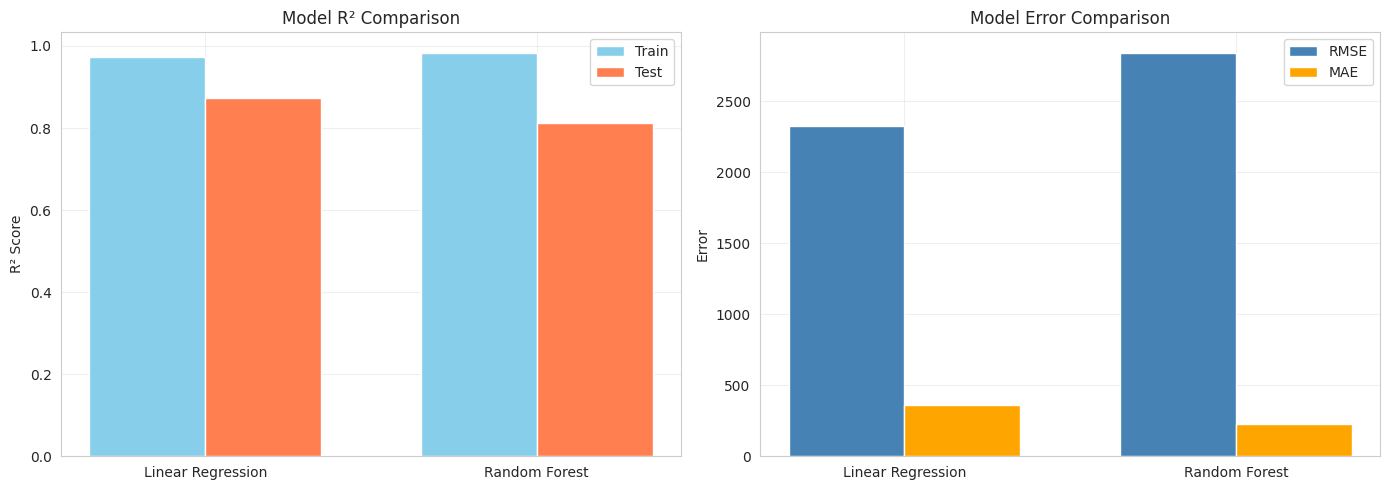


✓ Comparison complete!


In [24]:
print("Model Comparison")
print("="*80)

if not lr_trained or not rf_trained:
    print("\n⚠ Cannot compare models - one or more models failed to train")
    print("\nTroubleshooting:")
    print("  1. Check Block 9 output for data issues")
    print("  2. Verify data has valid numerical columns")
    print("  3. Check for excessive missing values")
    print("  4. Try re-running from Block 3")
else:
    # Create comparison table
    comparison = pd.DataFrame({
        'Model': ['Linear Regression', 'Random Forest'],
        'Train R²': [train_r2_lr, train_r2_rf],
        'Test R²': [test_r2_lr, test_r2_rf],
        'Test RMSE': [test_rmse_lr, test_rmse_rf],
        'Test MAE': [test_mae_lr, test_mae_rf]
    })

    print("\nComparison Table:")
    print(comparison.to_string(index=False))

    # Visualize comparison
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # R² Comparison
    models = comparison['Model']
    x_pos = np.arange(len(models))
    width = 0.35

    axes[0].bar(x_pos - width/2, comparison['Train R²'], width, label='Train', color='skyblue')
    axes[0].bar(x_pos + width/2, comparison['Test R²'], width, label='Test', color='coral')
    axes[0].set_ylabel('R² Score')
    axes[0].set_title('Model R² Comparison')
    axes[0].set_xticks(x_pos)
    axes[0].set_xticklabels(models)
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)

    # RMSE Comparison
    axes[1].bar(x_pos - width/2, comparison['Test RMSE'], width, label='RMSE', color='steelblue')
    axes[1].bar(x_pos + width/2, comparison['Test MAE'], width, label='MAE', color='orange')
    axes[1].set_ylabel('Error')
    axes[1].set_title('Model Error Comparison')
    axes[1].set_xticks(x_pos)
    axes[1].set_xticklabels(models)
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    print("\n✓ Comparison complete!")

In [25]:
print("\n" + "="*80)
print("FINAL ANALYSIS SUMMARY")
print("="*80)

# Get year columns
year_cols = [col for col in df.columns if str(col).isdigit()]

print(f"\n1. Dataset Overview:")
print(f"   - Total Records: {len(df)}")
print(f"   - Total Columns: {len(df.columns)}")
print(f"   - Year Columns: {len(year_cols)}")
print(f"   - Missing Values: {df[year_cols].isnull().sum().sum()}")

# Check if models were trained
try:
    if not lr_trained or not rf_trained:
        print(f"\n2. Model Status:")
        print(f"   ⚠ Models could not be trained")
        print(f"\n3. Possible Issues:")
        print(f"   - Insufficient valid data samples")
        print(f"   - Excessive missing values in dataset")
        print(f"   - Target variable may be non-numeric")
        print(f"\n4. Recommendations:")
        print(f"   - Re-run Block 3 to check data loading")
        print(f"   - Check Block 4 cleaning results")
        print(f"   - Verify data has numerical columns")
        print(f"   - Consider using different target variable")
    else:
        # Best model
        best_model = 'Random Forest' if test_r2_rf > test_r2_lr else 'Linear Regression'
        best_r2 = max(test_r2_rf, test_r2_lr)

        print(f"\n2. Model Performance:")
        print(f"   Linear Regression:")
        print(f"     - Test R²: {test_r2_lr:.4f}")
        print(f"     - Test RMSE: {test_rmse_lr:.4f}")
        print(f"   ")
        print(f"   Random Forest:")
        print(f"     - Test R²: {test_r2_rf:.4f}")
        print(f"     - Test RMSE: {test_rmse_rf:.4f}")

        print(f"\n3. Best Model:")
        print(f"   - Model: {best_model}")
        print(f"   - Test R²: {best_r2:.4f}")

        print(f"\n4. Key Insights:")
        if best_r2 > 0.7:
            print(f"   ✓ Excellent model performance (R² > 0.7)")
        elif best_r2 > 0.5:
            print(f"   ✓ Good model performance (R² > 0.5)")
        else:
            print(f"   ⚠ Moderate model performance (R² < 0.5)")
            print(f"   Consider: Feature engineering, more data, or different models")

        print(f"\n5. Recommendations:")
        if train_r2_rf - test_r2_rf > 0.1:
            print(f"   - Model shows overfitting")
            print(f"   - Try: Reduce complexity, add regularization")
        else:
            print(f"   - Model generalizes well")
except NameError:
    print(f"\n2. Model Status:")
    print(f"   ⚠ Models were not trained")
    print(f"\n3. Troubleshooting:")
    print(f"   - Check Block 9 for data preparation issues")
    print(f"   - Verify Block 10-11 ran successfully")
    print(f"   - Check for error messages in previous blocks")

print(f"\n" + "="*80)
print("✓ ANALYSIS COMPLETE!")
print("="*80)


FINAL ANALYSIS SUMMARY

1. Dataset Overview:
   - Total Records: 23870
   - Total Columns: 26
   - Year Columns: 24
   - Missing Values: 0

2. Model Performance:
   Linear Regression:
     - Test R²: 0.8740
     - Test RMSE: 2327.2113
   
   Random Forest:
     - Test R²: 0.8118
     - Test RMSE: 2844.6092

3. Best Model:
   - Model: Linear Regression
   - Test R²: 0.8740

4. Key Insights:
   ✓ Excellent model performance (R² > 0.7)

5. Recommendations:
   - Model shows overfitting
   - Try: Reduce complexity, add regularization

✓ ANALYSIS COMPLETE!
